<a href="https://colab.research.google.com/github/EXYNOS-999/corona_prophet/blob/master/prophet_prediction_china.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data=pd.read_csv("/content/2019_nCoV_data.csv")

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
Sno               497 non-null int64
Province/State    393 non-null object
Country           497 non-null object
Last Update       497 non-null object
Confirmed         497 non-null float64
Deaths            497 non-null float64
Recovered         497 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.3+ KB


In [0]:
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [0]:
usa=data[data['Country']=='US']
mchina=data[data['Country']=='Mainland China']
mchina=data[data['Country']=='China']
mchina.sort_values(['Last Update'])

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
32,33,Xinjiang,China,2020-01-22 12:00:00,0.0,0.0,0.0
30,31,Tibet,China,2020-01-22 12:00:00,0.0,0.0,0.0
29,30,Tianjin,China,2020-01-22 12:00:00,4.0,0.0,0.0
28,29,Taiwan,China,2020-01-22 12:00:00,1.0,0.0,0.0
27,28,Sichuan,China,2020-01-22 12:00:00,5.0,0.0,0.0
26,27,Shanxi,China,2020-01-22 12:00:00,1.0,0.0,0.0
25,26,Shanghai,China,2020-01-22 12:00:00,9.0,0.0,0.0
24,25,Shandong,China,2020-01-22 12:00:00,2.0,0.0,0.0
23,24,Shaanxi,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [0]:
hk=data[data['Country']=='Hong Kong']
hkgrouped_country=data.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']]

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
50,51,Hong Kong,Hong Kong,2020-01-23 12:00:00,2.0,0.0,0.0
108,109,Hong Kong,Hong Kong,2020-01-24 12:00:00,2.0,0.0,0.0
150,151,Hong Kong,Hong Kong,2020-01-25 12:00:00,5.0,0.0,0.0
193,194,Hong Kong,Hong Kong,2020-01-26 23:00:00,8.0,0.0,0.0
241,242,Hong Kong,Hong Kong,2020-01-27 20:30:00,8.0,0.0,0.0
296,297,Hong Kong,Hong Kong,2020-01-28 23:00:00,8.0,0.0,0.0
348,349,Hong Kong,Hong Kong,2020-01-29 21:00:00,10.0,0.0,0.0
404,405,Hong Kong,Hong Kong,2020-01-30 21:30:00,12.0,0.0,0.0
463,464,Hong Kong,Hong Kong,2020-01-31 19:00:00,13.0,0.0,0.0


In [0]:
grouped_country=data.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']]
china=data[(data['Country']=='China') |( data['Country']=='Mainland China')|( data['Country']=='Hong Kong')]
china['Country'].replace('Mainland China','Chinese Sub',inplace=True)
china['Country'].replace('Hong Kong','Chinese Sub',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
!pip install prophet

  Created wheel for prophet: filename=prophet-0.1.1-cp36-none-any.whl size=12168 sha256=4c8f56c0e39230908b2ca4ca72ff327fe88424bd2139e21a15b5972fe629fb69
  Stored in directory: /root/.cache/pip/wheels/77/3e/f3/1c536bf1f871f818686e7fbf31cab18d52787a72dea8640756
Successfully built prophet


In [0]:
from fbprophet import Prophet


In [0]:
Chinese.columns=['ds','y','Deaths','Recovered']
chinese=Chinese.drop(columns=['Recovered','Deaths'])

NameError: ignored

In [0]:
m = Prophet()
m.fit(chinese)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


In [0]:
future = m.make_future_dataframe(periods=7,include_history=True)
future.tail()

,ds
13,2020-02-03 19:00:00
14,2020-02-04 19:00:00
15,2020-02-05 19:00:00
16,2020-02-06 19:00:00
17,2020-02-07 19:00:00


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
13,2020-02-03 19:00:00,13960.896227,13087.075800,14885.136401
14,2020-02-04 19:00:00,14872.690130,13928.715061,15726.489044
15,2020-02-05 19:00:00,15784.484034,14834.887760,16675.820136
16,2020-02-06 19:00:00,16696.277937,15790.846642,17652.380216
17,2020-02-07 19:00:00,17608.071842,16699.720005,18482.690718


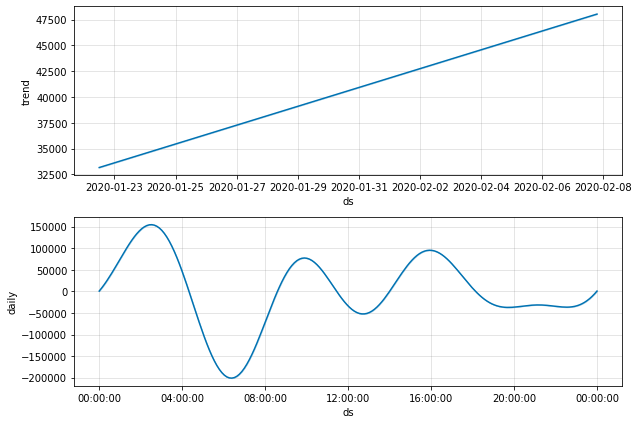

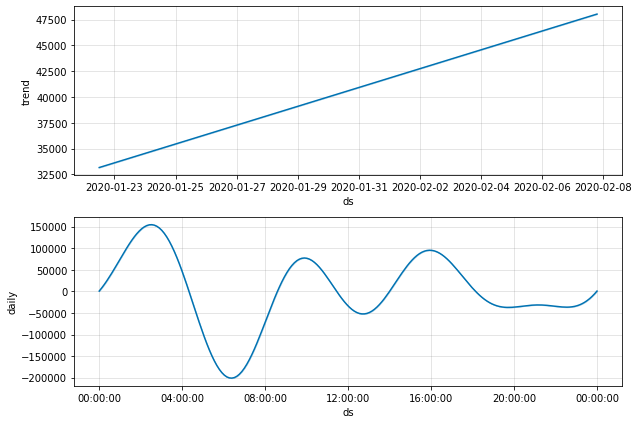

In [0]:
m.plot_components(forecast)

In [0]:
res=m.predict(future)

In [0]:
res
res.iloc[10]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22 12:00:00,33171.296277,-1516.494443,226.544779,33171.296277,33171.296277,-33805.349860,-33805.349860,-33805.349860,-33805.349860,-33805.349860,-33805.349860,0.0,0.0,0.0,-634.053583
1,2020-01-23 12:00:00,34083.090171,-663.348591,1219.989847,34083.090171,34083.090171,-33805.349858,-33805.349858,-33805.349858,-33805.349858,-33805.349858,-33805.349858,0.0,0.0,0.0,277.740314
2,2020-01-24 12:00:00,34994.884066,325.824601,2084.424341,34994.884066,34994.884066,-33805.349860,-33805.349860,-33805.349860,-33805.349860,-33805.349860,-33805.349860,0.0,0.0,0.0,1189.534206
3,2020-01-25 12:00:00,35906.677960,1214.916781,2890.342869,35906.677960,35906.677960,-33805.349858,-33805.349858,-33805.349858,-33805.349858,-33805.349858,-33805.349858,0.0,0.0,0.0,2101.328103
4,2020-01-25 22:00:00,36286.592087,765.197792,2605.976819,36286.592087,36286.592087,-34620.229560,-34620.229560,-34620.229560,-34620.229560,-34620.229560,-34620.229560,0.0,0.0,0.0,1666.362527
5,2020-01-26 23:00:00,37236.377402,2542.996762,4297.115889,37236.377402,37236.377402,-33822.077491,-33822.077491,-33822.077491,-33822.077491,-33822.077491,-33822.077491,0.0,0.0,0.0,3414.299911
6,2020-01-27 20:30:00,38053.192773,3432.436501,5139.207907,38053.192773,38053.192773,-33756.746570,-33756.746570,-33756.746570,-33756.746570,-33756.746570,-33756.746570,0.0,0.0,0.0,4296.446204
7,2020-01-28 23:00:00,39059.965208,4340.255073,6122.574416,39059.965208,39059.965208,-33822.077490,-33822.077490,-33822.077490,-33822.077490,-33822.077490,-33822.077490,0.0,0.0,0.0,5237.887718
8,2020-01-29 21:00:00,39895.776286,7456.747161,9211.203581,39895.776286,39895.776286,-31623.910411,-31623.910411,-31623.910411,-31623.910411,-31623.910411,-31623.910411,0.0,0.0,0.0,8271.865875
9,2020-01-30 21:30:00,40826.565896,7832.100905,9634.288030,40826.565896,40826.565896,-32054.880190,-32054.880190,-32054.880190,-32054.880190,-32054.880190,-32054.880190,0.0,0.0,0.0,8771.685706


In [0]:
res.iloc[10]

ds                            2020-01-31 19:00:00
trend                                     41643.4
yhat_lower                                10376.5
yhat_upper                                12135.7
trend_lower                               41643.4
trend_upper                               41643.4
additive_terms                           -30417.9
additive_terms_lower                     -30417.9
additive_terms_upper                     -30417.9
daily                                    -30417.9
daily_lower                              -30417.9
daily_upper                              -30417.9
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      11225.5
Name: 10, dtype: object

In [0]:
res.iloc[11]

ds                            2020-02-01 19:00:00
trend                                     42555.2
yhat_lower                                11215.9
yhat_upper                                  13079
trend_lower                               42555.2
trend_upper                               42555.2
additive_terms                           -30417.9
additive_terms_lower                     -30417.9
additive_terms_upper                     -30417.9
daily                                    -30417.9
daily_lower                              -30417.9
daily_upper                              -30417.9
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      12137.3
Name: 11, dtype: object

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


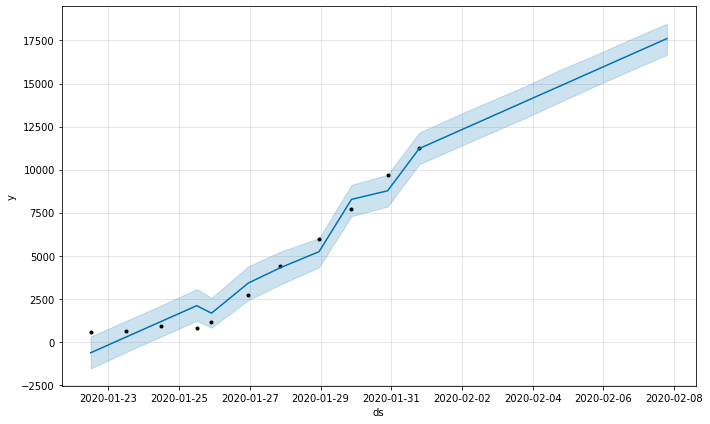

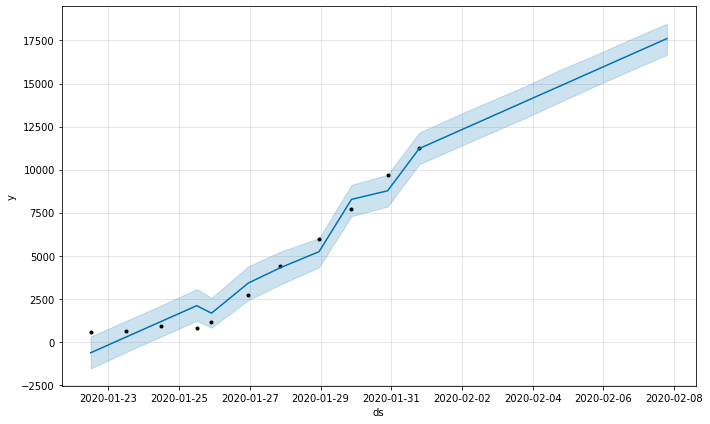

In [0]:
m = Prophet()
m.fit(chinese)
res=m.predict(future)
m.plot(res)


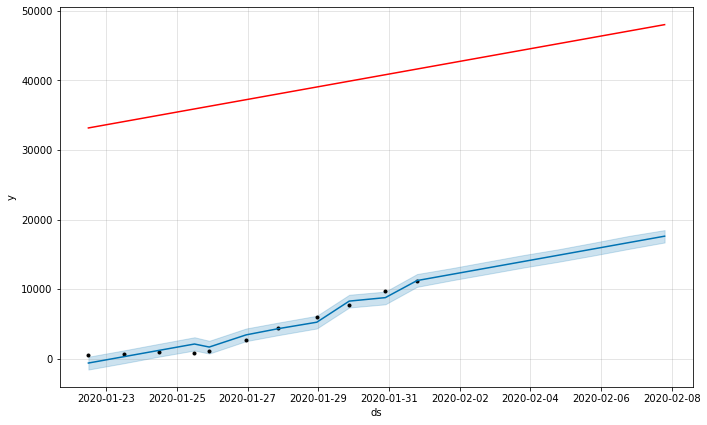

In [0]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


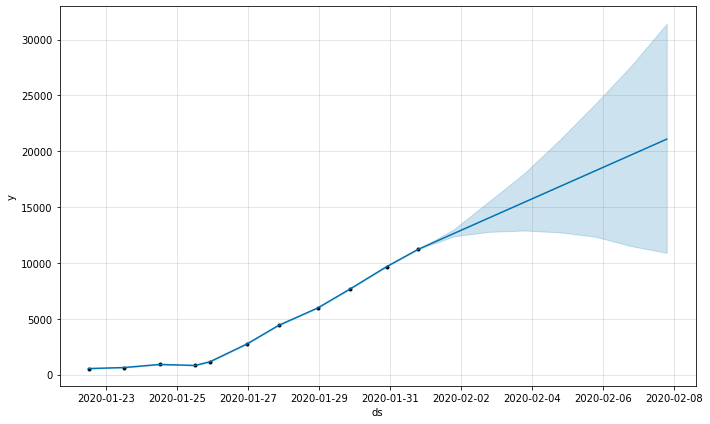

In [0]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(chinese).predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


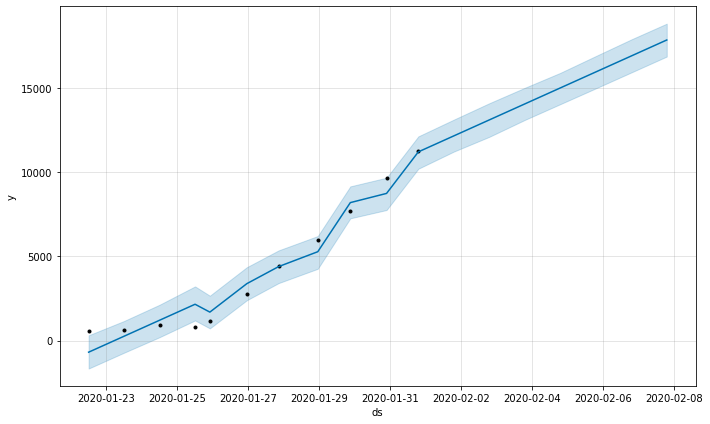

In [0]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(chinese).predict(future)
fig = m.plot(forecast)

Uncertainty in the trend

The biggest source of uncertainty in the forecast is the potential for future trend changes. The time series we have seen already in this documentation show clear trend changes in the history. 

It’s impossible to know for sure, so we do the most reasonable thing we can, and we assume that the future will see similar trend changes as the history. In particular, we assume that the average frequency and magnitude of trend changes in the future will be the same as that which we observe in the history. We project these trend changes forward and by computing their distribution we obtain uncertainty intervals.



In [0]:
forecast = Prophet(interval_width=0.95).fit(chinese).predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


Uncertainty in seasonality with full Bayesian sampling

In [0]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(chinese).predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


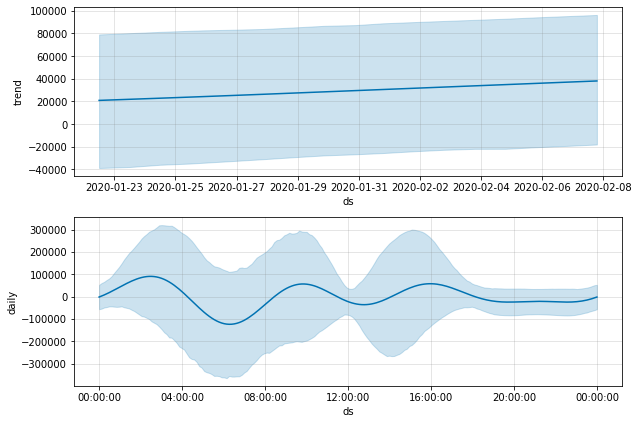

In [0]:
fig = m.plot_components(forecast)

In [0]:
m.predictive_samples(future)

{'trend': array([[17060.89163904, 17060.89163904, 20876.91088088, ...,
          8101.54288106,  3215.17178824,  3215.17178824],
        [19816.22933655, 19816.22933655, 22187.70869402, ...,
          9443.9316572 ,  5103.08622382,  5103.08622382],
        [22589.44855406, 22589.44855406, 23444.99489056, ...,
         10598.85101861,  7014.41801493,  7014.41801493],
        ...,
        [56926.03923035, 57011.24262888, 39040.47476095, ...,
         24783.69226384, 30476.89459962, 30286.92303038],
        [59714.80018813, 60044.02947693, 40357.8126119 , ...,
         25858.46898556, 32331.10946447, 32135.53261468],
        [62503.56114591, 63161.25477814, 41670.81038855, ...,
         26835.88523403, 34176.11541774, 33988.0501719 ]]),
 'yhat': array([[-1425.61486554,  3234.99089381,  -815.86525768, ...,
          -206.90438584, -2108.91499321, -8493.93078295],
        [-2572.83017989, -3520.41453069,   649.09621016, ...,
          3467.68882514, -1092.5828323 , -1256.59300866],
        

Fourier Order for Seasonalities

Seasonalities are estimated using a partial Fourier sum;see also:Forecasting at scale;partial Fourier sum can approximate an aribtrary periodic signal. The number of terms in the partial sum (the order) is a parameter that determines how quickly the seasonality can change.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


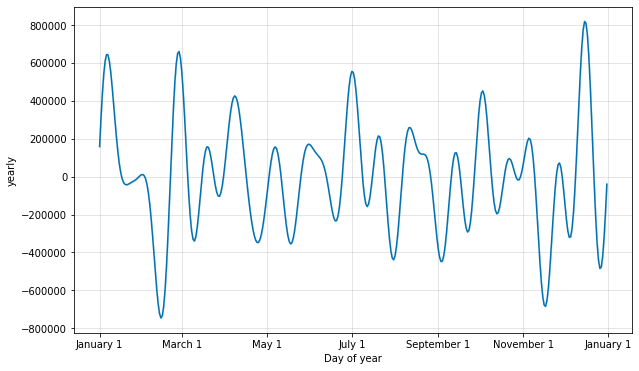

In [0]:
from fbprophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(chinese)
a = plot_yearly(m)

Specifying Custom Seasonalities

As an example, here we fit the data but replace the weekly seasonality with monthly seasonality. The monthly seasonality then will appear in the components plot:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


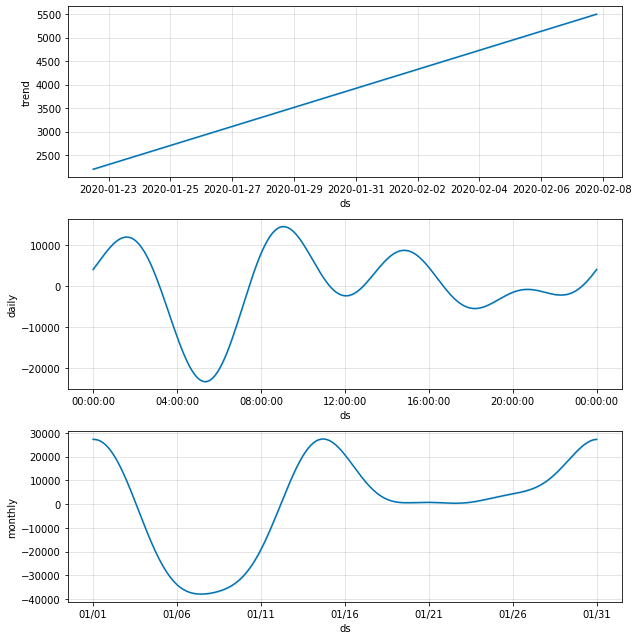

In [0]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(chinese).predict(future)
fig = m.plot_components(forecast)

Sub-daily data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


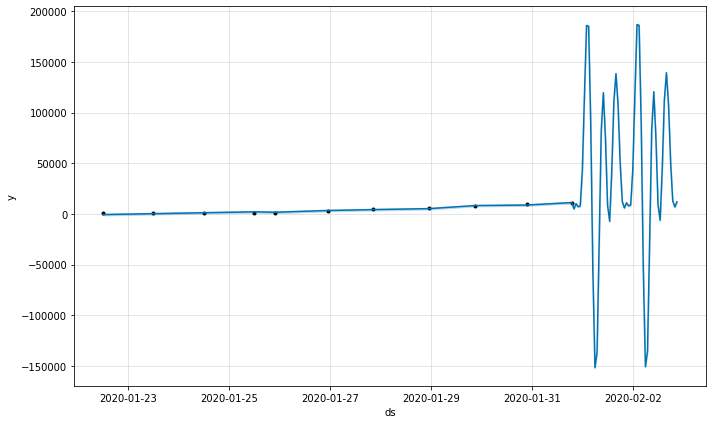

In [0]:
m = Prophet(changepoint_prior_scale=0.01).fit(chinese)
future = m.make_future_dataframe(periods=50, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

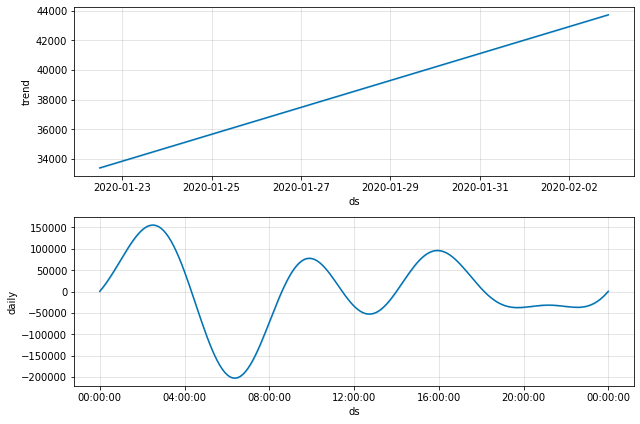

In [0]:
fig = m.plot_components(fcst)

Monthly data

We can use Prophet to fit monthly data. However, the underlying model is continuous-time, which means that you can get strange results if you fit the model to monthly data and then ask for daily forecasts.

This is the same issue from above where the dataset has regular gaps. When we fit the yearly seasonality, it only has data for the first of each month and the seasonality components for the remaining days are unidentifiable and overfit. This can be clearly seen by doing MCMC to see uncertainty in the seasonality:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


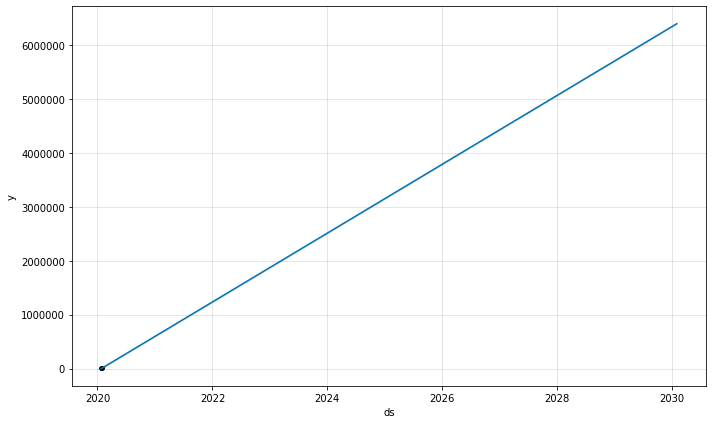

In [0]:
m = Prophet(seasonality_mode='multiplicative').fit(chinese)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


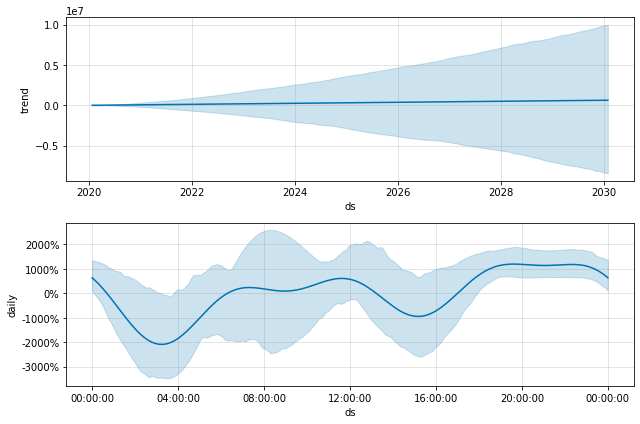

In [0]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(chinese)
fcst = m.predict(future)
fig = m.plot_components(fcst)

This is the same issue from above where the dataset has regular gaps. When we fit the yearly seasonality, it only has data for the first of each month and the seasonality components for the remaining days are unidentifiable and overfit. This can be clearly seen by doing MCMC to see uncertainty in the seasonality:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


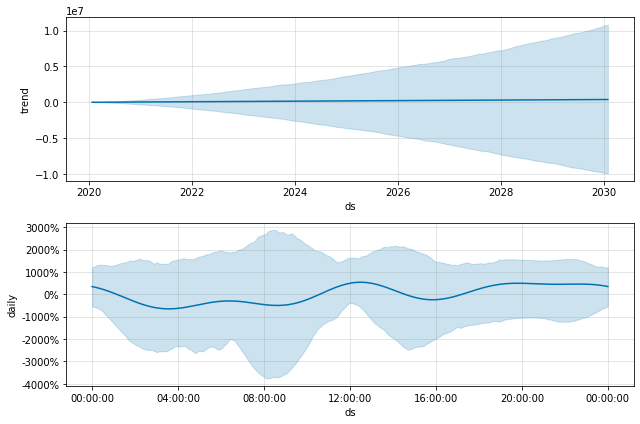

In [0]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(chinese)
fcst = m.predict(future)
fig = m.plot_components(fcst)


The seasonality has low uncertainty at the start of each month where there are data points, but has very high posterior variance in between. 

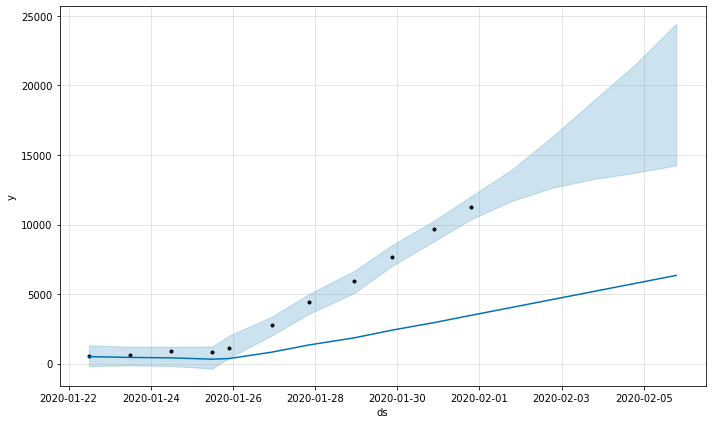

In [0]:
future = m.make_future_dataframe(periods=5, freq='D')
fcst = m.predict(future)
fig = m.plot(fcst)


Diagnostics and Cross-Validation 

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [0]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='8 days', period='1 days', horizon = '1 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-30 19:00:00 and 2020-01-30 19:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-30 21:30:00,2933.051469,6866.630026,10520.760782,9670.0,2020-01-30 19:00:00
1,2020-01-31 19:00:00,2490.279629,-4044.836656,20931.847206,11234.0,2020-01-30 19:00:00
